# Context
Open the data in the file catterplot.sav. These data measure two variables: 
- `dinner_time`: the time since last feeding a cat.
- `meow`: how loud their purr is.

# Objectives

1. Describe the distribution of `dinner_time`.
2. Draw a scatterplot of `meow` against `dinner_time` with the LOESS curve. Do you think the two variables are linearly related?
3. Compute the correlation coefficient of `dinner_time` and `meow`. Does the correlation coefficient suggest a strong linear relationship?
4. Test the null hypothesis that the two variables are not linearly related at the 5% level.
5. (Extra credit) Obtain a 95% confidence interval for the population correlation coefficient of the two variables. 

In [1]:
import pandas as pd
catterplot_df = pd.read_spss('./datasets/catterplot.sav')

# Solutions

## A dataset check-up

Looks well structured, nice! 

In [24]:
print(f'Description on the dataset: \n',catterplot_df.describe())

Description on the dataset: 
        dinner_time       meow
count    78.000000  78.000000
mean      9.865385   8.217949
std       6.068159   3.747371
min       1.000000   2.000000
25%       5.000000   5.000000
50%       9.000000   8.000000
75%      14.000000  12.000000
max      24.000000  15.000000


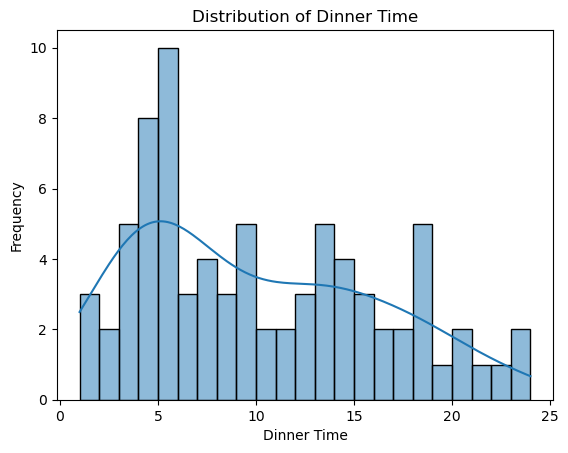

In [32]:
#| label: fig-injury-histogram
#| fig-cap: Distribution of the pain scores

import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram to reveal the destribution. 
dinner_time_hist = sns.histplot(catterplot_df, x='dinner_time', kde=True, bins=23)
# Set titles and labels for x- and y- axis
dinner_time_hist.set_title('Distribution of Dinner Time')
dinner_time_hist.set_xlabel('Dinner Time')
dinner_time_hist.set_ylabel('Frequency')
# Display the plot
plt.show()

## Q2: The (s)catterplot

**Answer**

The 

**Solution**


In [ ]:
#| label: fig-catterplot
#| fig-cap: The scatterplot on meow againt dinnertime. 

import matplotlib.pyplot as plt
import seaborn as sns

catterplot = sns.regplot(catterplot_df, x='dinner_time', y='meow', fit_reg=True, lowess=True)
catterplot.set_title('The (S)catterplot')
catterplot.set_xlabel('Dinner Time')
catterplot.set_ylabel('Loudness of Meowing')
plt.show()

# Q3: The Pearson r

In [ ]:
catterplot_df.corr(method='pearson')

In [ ]:
import scipy.stats as stats

corr_coef, p_value = stats.pearsonr(catterplot_df.meow, catterplot_df.dinner_time)

print(corr_coef)

# Q4: Linear Relations Tested


In [ ]:
print(p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: there is evidence of a linear relationship.")
else:
    print("Fail to reject the null hypothesis: no significant linear relationship.")

# Q5: 95% CI for the population correlation coefficient

In [ ]:
import numpy as np

def correlation_coefficient(df): 
    n = len(df)
    z = np.arctanh(corr_coef)  # Fisher transformation
    se = 1 / np.sqrt(n - 3)
    z_critical = stats.norm.ppf(0.975)  # 95% confidence
    z_conf_interval = [z - z_critical * se, z + z_critical * se]
    conf_interval = np.tanh(z_conf_interval)
    return conf_interval

correlation_coefficient(catterplot_df)

# Final thought: Cats good, humans bad. 

In Chinese social media there's a meme called "Cats good, humans bad (貓好人壞)", where cats are always right and people account cat's misbehavior on humans fault. 


{{< pagebreak >}}

```{raw}
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣀⣀⣀⣀⣀⣤⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⡠⠤⠤⠒⠒⠈⠉⠙⠒⠲⣌⠉⢁⣀⢼⠷⠃⠈⢹⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⢶⠲⣿⠋⠉⠉⠽⠛⣹⡟⠁⠀⠀⠀⠀⠀⠀⠀⠀⠤⣀⠀⠑⠞⠒⠒⠒⠀⠀⣼⣦⣀⢴⡆⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠈⢆⠀⠀⠀⠀⠀⢸⠏⠀⠀⠀⠀⠄⠀⠀⠁⠀⢠⠀⠈⠑⢄⠀⡀⢄⡄⠀⢠⣿⣿⡧⢸⠁⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠈⣆⠀⠀⠀⢀⠃⠀⠀⠀⠀⢠⠃⠀⠀⠀⠀⠀⢇⠀⠀⠀⢀⡘⡄⠁⢀⠟⠉⠁⠀⡞⠀⠀⠀⠀⠀⠀⠀⠀⠀
⡖⠢⢤⣏⢆⠀⠀⡆⢀⡆⢀⠀⠀⢸⠀⠀⠀⠀⠀⡀⠸⡀⠀⠀⠀⠓⠸⡀⠘⣆⡀⠀⢰⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠹⡄⠀⠈⠝⢷⣼⡇⢸⠁⠀⠀⠀⡘⣾⠀⠀⠀⠀⠗⠦⠥⠤⡤⠂⠀⠀⡇⠀⣿⣄⠀⠘⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⢹⡤⠆⢀⡴⢿⡇⢸⠀⢸⡴⠊⠉⠙⠣⣀⠀⡀⠀⠀⣨⣿⣿⡶⣤⡆⢳⡀⣿⠀⠉⠒⠛⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠘⡇⠀⡠⢲⠃⢃⠈⣦⣘⡷⢶⣶⣦⣄⠈⠁⠀⠀⣾⣏⢽⣿⣧⣟⡇⠀⡿⢻⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠇⠈⣰⠋⢳⠘⣤⢼⡈⣇⢿⡾⡟⡿⠃⠀⣀⡀⠀⠙⠓⠛⠋⣸⣵⠄⢸⣰⠃⠀⠀⠀⠀⢀⡠⠤⠤⢄⠀⠀⠀
⠀⠀⠘⡤⠃⠀⢸⣿⠻⡀⢣⡈⠀⠉⠉⠁⠀⠀⠀⠀⠀⠀⠀⠠⠾⢏⡿⠀⢸⢿⠀⠀⢠⣤⡔⠁⣀⢄⡀⠀⠙⡄⠀
⠀⠀⠀⠀⠀⢠⣿⢿⡄⠀⢲⣯⡟⠁⠀⠀⠀⠒⠊⠉⠀⠀⠀⣀⣴⠾⣤⣴⢃⣼⠀⠀⠀⣽⠁⠀⢠⡜⠁⠀⠀⢰⠀
⠀⠀⠀⠀⠀⠠⢷⡆⢱⣀⠈⢻⣏⣑⣶⠤⠤⣤⠤⠤⠤⠶⣏⠉⠀⢀⠿⣇⣴⠃⠀⠀⠀⠘⡄⠀⠀⠡⠄⠀⠀⡜⠀
⠀⠀⠀⣷⡀⢰⠋⢻⢸⠈⠉⠉⠁⠀⠀⠀⣾⡿⠒⠤⢄⣰⡟⣷⣀⢸⣠⠏⢹⠀⣀⣠⠀⠀⠈⠢⠤⠤⠤⠤⠊⠀⠀
⠀⠀⠀⡟⢳⣿⠀⠌⣸⠁⣀⣀⣀⣠⠴⠊⠉⢑⣒⠤⣤⣤⣶⣿⠾⣯⠉⠓⠻⣏⢁⠞⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠐⣷⠀⣿⣧⣾⡟⠋⡜⠉⠁⠀⠀⠸⣍⠉⢉⠉⣿⣿⣅⠀⢠⠃⠀⢸⡀⠈⢿⣄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠘⡾⠁⠈⡟⠁⡜⠀⠀⢀⡀⠀⠀⠘⡆⠁⡰⠋⢣⢹⠳⣮⠀⠀⠈⣷⠀⠀⠀⠙⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⢠⠁⡀⣀⡿⠞⠀⠀⠀⠈⡇⠀⠀⠀⠳⠞⠀⠀⠈⠻⠖⠁⠀⠀⠀⠈⢷⡄⠀⠀⠈⢳⡄⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠘⠻⢻⣿⠀⠀⠀⠀⠀⢰⡧⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢧⡀⢀⣿⣇⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⣿⣿⠀⠠⡀⠀⠀⡞⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢻⣿⠗⠙⠳⣄⠀⠀⠀⠀⠀
⠀⠀⠀⢀⡞⠉⠉⠑⢄⡈⠻⢤⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⡇⠀⠀⠀⠈⠳⣄⠀⠀⠀
⠀⠀⢀⣾⠀⠀⠀⠀⠀⠈⠒⣼⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣴⠃⠀⠀⠀⠀⠀⠈⠏⠒⠤
⢀⡴⠋⠀⠀⠀⠀⠀⠀⠀⡰⠛⢿⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⣾⠛⠦⣄⡀⠀⠀⠀⠀⠀⠀⠀
                                  
```